In [1]:
import earthkit.data
import earthkit.plots

In [2]:
vorticity = earthkit.data.from_source(
    "file",
    "/Users/mavj/Downloads/vorticity.grib",
)

wind = earthkit.data.from_source(
    "file",
    "/Users/mavj/Downloads/ghtuv.grib",
)

In [3]:
vorticity.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,vo,isobaricInhPa,300,20170520,0,30,fc,0,regular_ll
1,ecmf,vo,isobaricInhPa,700,20170520,0,30,fc,0,regular_ll


In [4]:
wind.sel(level=700, short_name=["u", "v"]).ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,700,20170520,0,30,fc,0,regular_ll
1,ecmf,v,isobaricInhPa,700,20170520,0,30,fc,0,regular_ll


In [5]:
PRESSURE = 700

LEVELS = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 50]
LEVELS = [0-level for level in LEVELS[::-1]] + [0] + LEVELS

In [6]:
STYLE = earthkit.plots.styles.Style(
    colors="RdYlBu_r",
    levels=LEVELS,
    extend="both",
    scale_factor=10**5,
    ticks=LEVELS,
)

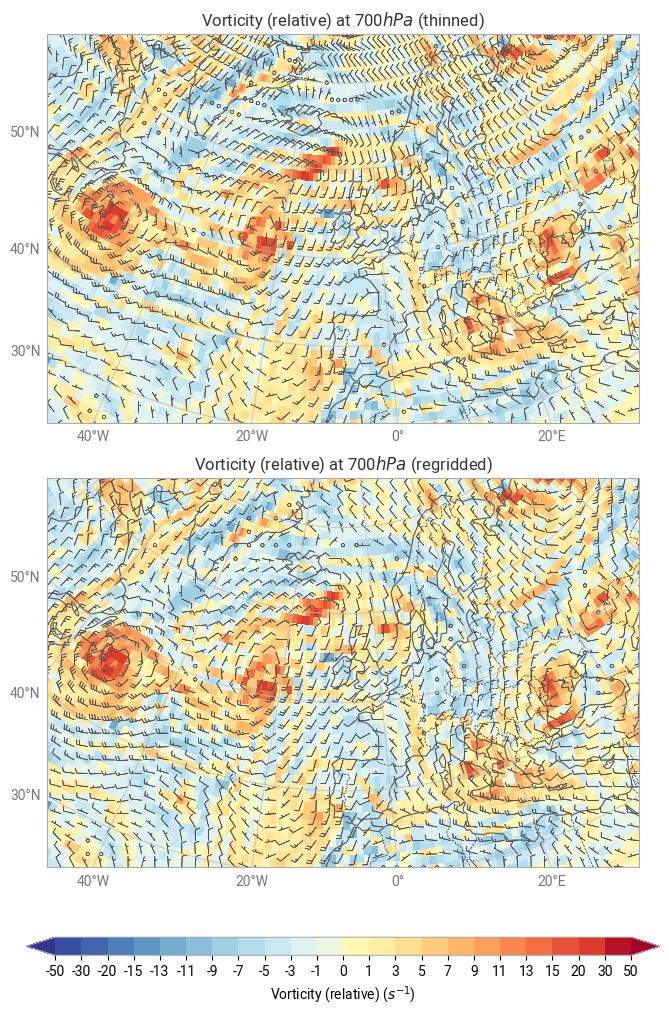

In [7]:
figure = earthkit.plots.Figure(rows=2, size=(8, 10))

thinned = figure.add_map(domain="North Atlantic")
thinned.block(vorticity.sel(level=PRESSURE), style=STYLE)
thinned.barbs(wind.sel(level=PRESSURE, short_name=["u", "v"]), every=2)
thinned.title("{variable_name!0} at {level!0}$hPa$ (thinned)")

regridded = figure.add_map(domain="North Atlantic")
regridded.block(vorticity.sel(level=PRESSURE), style=STYLE)
regridded.barbs(wind.sel(level=PRESSURE, short_name=["u", "v"]), regrid_shape=30)
regridded.title("{variable_name!0} at {level!0}$hPa$ (regridded)")

figure.borders()
figure.coastlines()
figure.gridlines()

figure.legend()

figure.show()